In [1]:
import pandas as pd 
import numpy as np

In [4]:
df=pd.read_csv('C://Users//hp//OneDrive//Documents//sentiment//train//train.csv')

In [5]:
df.head()

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [6]:
df.shape

(3599999, 3)

In [7]:
df=df[:100000]

In [8]:
df.shape

(100000, 3)

In [11]:
column=['sentiment','title','text']
df.columns=column

In [12]:
df.head()

,sentiment,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [14]:
df['sentiment']=df['sentiment'].replace({2:1,1:0})

In [15]:
df.head()

,sentiment,title,text
0,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,1,Amazing!,This soundtrack is my favorite music of all ti...
2,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,1,an absolute masterpiece,I am quite sure any of you actually taking the...


In [16]:
df.isnull().sum()

sentiment    0
title        5
text         0
dtype: int64

In [17]:
df[df['title'].isna()==True]

,sentiment,title,text
13264,0,NaN,Couldn't get the device to work with my networ...
26553,0,NaN,What separates this band from Evanescence (bes...
26826,1,NaN,Falkenbach returns with more of the Viking/Fol...
36597,1,NaN,I returned this because I received the same on...
37346,1,NaN,This book is a great fantasy. I love this amaz...


In [18]:
df.duplicated().sum()

0

In [25]:
df['sentiment'].value_counts()

sentiment
1    51267
0    48733
Name: count, dtype: int64

In [27]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

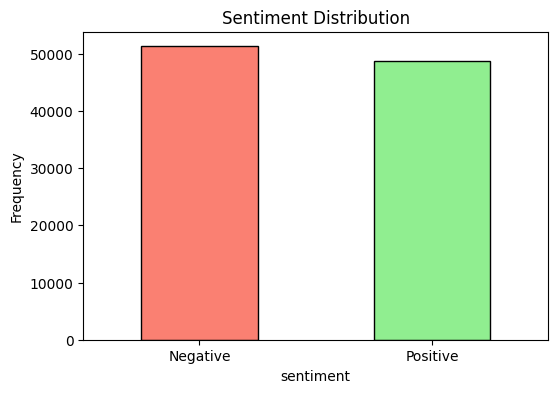

In [31]:
plt.figure(figsize=(6, 4))
df['sentiment'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'], edgecolor='black')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)
plt.title('Sentiment Distribution')
plt.ylabel('Frequency')
plt.show()


In [32]:
df['length']=df['text'].apply(len)

<Axes: ylabel='Frequency'>

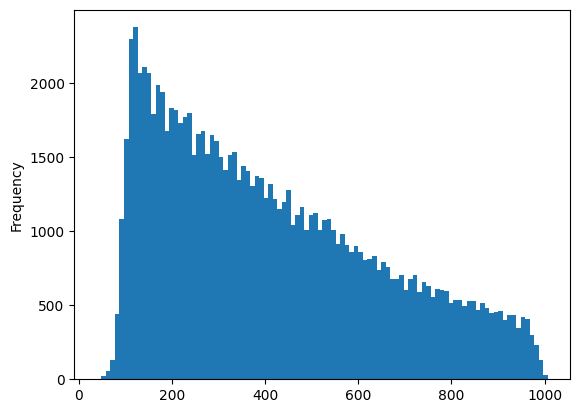

In [33]:
df['length'].plot(bins=100,kind='hist')

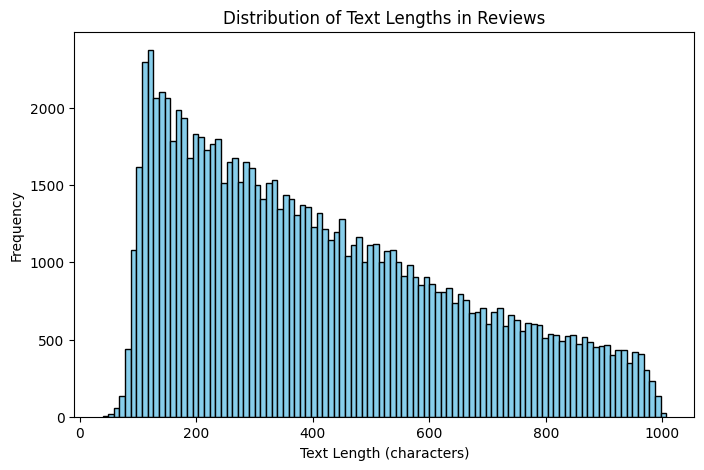

In [34]:
# Plot histogram for text length
df['length'].plot(kind='hist', bins=100, color='skyblue', edgecolor='black', figsize=(8, 5))
plt.title('Distribution of Text Lengths in Reviews')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

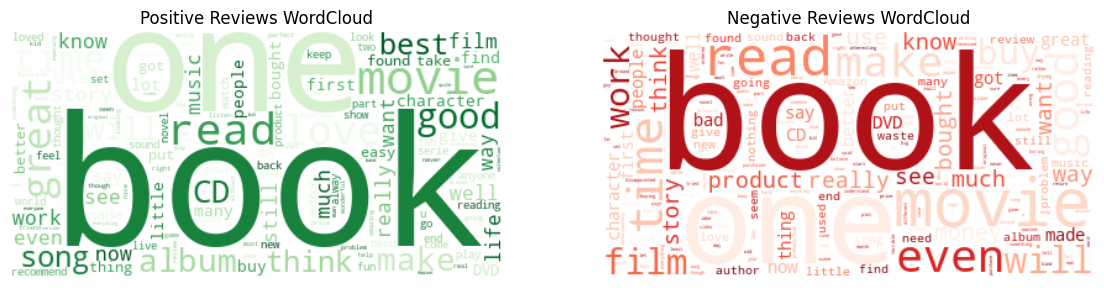

In [35]:
# Combine all text for positive and negative reviews
positive_text = " ".join(df[df['sentiment'] == 1]['text'])
negative_text = " ".join(df[df['sentiment'] == 0]['text'])

# Plot WordClouds
plt.figure(figsize=(14, 7))

# WordCloud for Positive Reviews
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(background_color='white', colormap='Greens').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews WordCloud')

# WordCloud for Negative Reviews
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews WordCloud')

plt.show()


In [36]:
df.head()

,sentiment,title,text,length
0,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,470
1,1,Amazing!,This soundtrack is my favorite music of all ti...,750
2,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,721
3,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",425
4,1,an absolute masterpiece,I am quite sure any of you actually taking the...,800


In [37]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


def text_cleaning(text):
    #Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"https?://\S+|www\.\S+", '', text)#before

    # Remove text in square brackets and parentheses
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\(.*?\)', '', text)

    #Remove numbers (standalone numbers only)
    text = re.sub(r'\b\d+\b', '', text)#before

    # Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    
    # Tokenize, remove stopwords, and retain only alphabetic words
    text = ' '.join([w for w in nltk.word_tokenize(text) if w.isalpha() and w not in stop_words])

     #Strip extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()#before
    
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
preprocess_text=df['text'].apply(text_cleaning)

In [39]:
preprocess_text

0        im reading lot reviews saying best game soundt...
1        soundtrack favorite music time hands intense s...
2        truly like soundtrack enjoy video game music p...
3        youve played game know divine music every sing...
4        quite sure actually taking time read played ga...
                               ...                        
99995    real adventures real superman george reeves su...
99996    sylvain beauregard widely known diehard celine...
99997    think know person wrote book celine buddy one ...
99998    call overkill many books need written celine b...
99999    hi think great book collector im fan fan ive u...
Name: text, Length: 100000, dtype: object

In [40]:
import re
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


def text_cleaning(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r"https?://\S+|www\.\S+", '', text)

    # Remove text in square brackets and parentheses
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\(.*?\)', '', text)

    # Remove standalone numbers
    text = re.sub(r'\b\d+\b', '', text)

    # Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    
    # Tokenize, remove stopwords, and retain only alphabetic words
    words = [w for w in nltk.word_tokenize(text) if w.isalpha() and w not in stop_words]

    return words  # Return list of cleaned words

In [41]:
clean_text=df['text'].apply(text_cleaning)

In [42]:
clean_text

0        [im, reading, lot, reviews, saying, best, game...
1        [soundtrack, favorite, music, time, hands, int...
2        [truly, like, soundtrack, enjoy, video, game, ...
3        [youve, played, game, know, divine, music, eve...
4        [quite, sure, actually, taking, time, read, pl...
                               ...                        
99995    [real, adventures, real, superman, george, ree...
99996    [sylvain, beauregard, widely, known, diehard, ...
99997    [think, know, person, wrote, book, celine, bud...
99998    [call, overkill, many, books, need, written, c...
99999    [hi, think, great, book, collector, im, fan, f...
Name: text, Length: 100000, dtype: object

In [43]:
preprocess_text

0        im reading lot reviews saying best game soundt...
1        soundtrack favorite music time hands intense s...
2        truly like soundtrack enjoy video game music p...
3        youve played game know divine music every sing...
4        quite sure actually taking time read played ga...
                               ...                        
99995    real adventures real superman george reeves su...
99996    sylvain beauregard widely known diehard celine...
99997    think know person wrote book celine buddy one ...
99998    call overkill many books need written celine b...
99999    hi think great book collector im fan fan ive u...
Name: text, Length: 100000, dtype: object

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocess_text)

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF Features DataFrame:")
print(tfidf_df.head())


TF-IDF Features DataFrame:
   able  absolutely  across  act  acting  action  actors  actual  actually  \
0   0.0    0.000000     0.0  0.0     0.0     0.0     0.0     0.0  0.000000   
1   0.0    0.167263     0.0  0.0     0.0     0.0     0.0     0.0  0.000000   
2   0.0    0.000000     0.0  0.0     0.0     0.0     0.0     0.0  0.000000   
3   0.0    0.000000     0.0  0.0     0.0     0.0     0.0     0.0  0.000000   
4   0.0    0.000000     0.0  0.0     0.0     0.0     0.0     0.0  0.151145   

   add  ...  wrong     wrote  year     years  yes  yet  youll  young  youre  \
0  0.0  ...    0.0  0.000000   0.0  0.150130  0.0  0.0    0.0    0.0    0.0   
1  0.0  ...    0.0  0.000000   0.0  0.124158  0.0  0.0    0.0    0.0    0.0   
2  0.0  ...    0.0  0.000000   0.0  0.000000  0.0  0.0    0.0    0.0    0.0   
3  0.0  ...    0.0  0.220522   0.0  0.000000  0.0  0.0    0.0    0.0    0.0   
4  0.0  ...    0.0  0.000000   0.0  0.000000  0.0  0.0    0.0    0.0    0.0   

      youve  
0  0.000000  
1

In [46]:
from sklearn.model_selection import train_test_split

# Assuming you have the target column as 'Sentiment' in your DataFrame
X = tfidf_df  # Your feature set (TF-IDF transformed text)
y = df['sentiment']  # Target variable (Sentiment: 0 for negative, 1 for positive)

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 80000
Test set size: 20000


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)



LogisticRegression()

In [48]:
# Predict on the test set
y_pred = model.predict(X_test)


In [49]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 83.08%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      9688
           1       0.83      0.85      0.84     10312

    accuracy                           0.83     20000
   macro avg       0.83      0.83      0.83     20000
weighted avg       0.83      0.83      0.83     20000



In [52]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)

<Axes: >

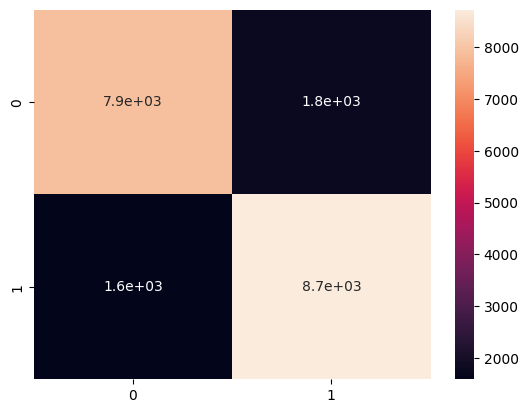

In [53]:
sns.heatmap(cm,annot=True)

In [54]:
# Clean new text (make sure to apply the same cleaning process)
new_text = ["This product is amazing!", "I really hate the service."]
new_text_cleaned = [text_cleaning(text) for text in new_text]  # Clean the text
new_text_tfidf = tfidf_vectorizer.transform([' '.join(words) for words in new_text_cleaned])  # Convert to TF-IDF

# Predict sentiment for new text
new_predictions = model.predict(new_text_tfidf)
print("Predictions for new text:", new_predictions)


Predictions for new text: [1 0]


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
